In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Term 5\\Data Mining\\project\\healthcare-dataset-stroke-data.csv")


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

our dataset contain 12  columns and 5110 rows

# features types
## numeric
age

avg_glucose_level

bmi
## boolean and categorical

gender

hypertension

heart_disease

ever_married

work_type

Residence_typr

smoking_status

stroke

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Missing values

Only bmi contain missing vales 201 rows

In [6]:
df.describe() # no indicateion for outliers but need more analysis as mean approxamienly equal median

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].nunique()} unique values")  # x1 seems irrelevant

gender: 3 unique values
ever_married: 2 unique values
work_type: 5 unique values
Residence_type: 2 unique values
smoking_status: 4 unique values


In [8]:
df.duplicated().sum()

0

## Target variable analysis

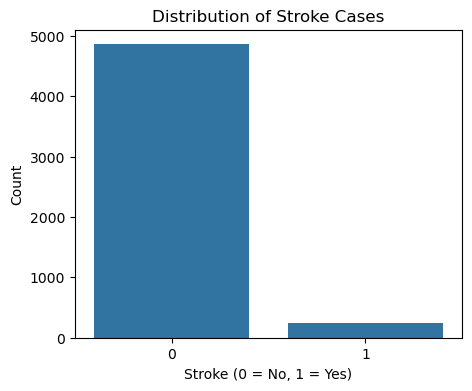

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x="stroke", data=df)
plt.title("Distribution of Stroke Cases")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
#most cases doesnt have stroke

In [10]:
df['stroke'].value_counts()
#imbalance ??

stroke
0    4861
1     249
Name: count, dtype: int64

## Univariate analysis

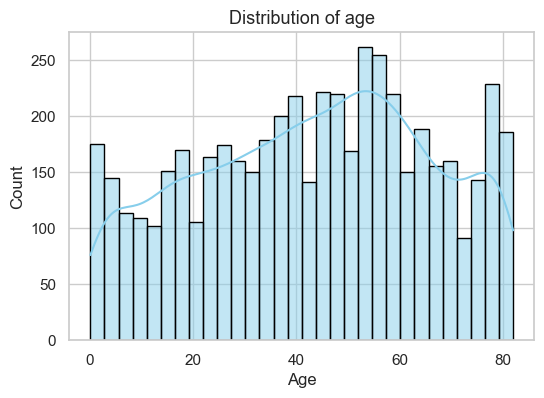

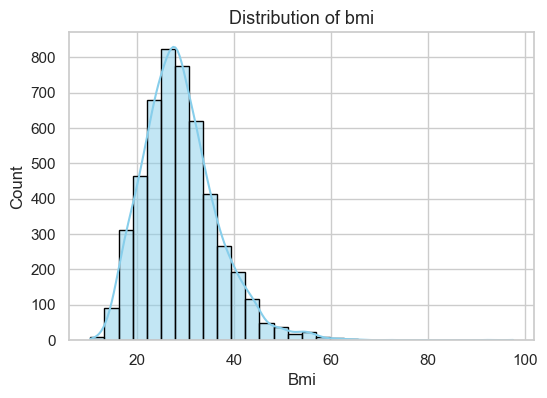

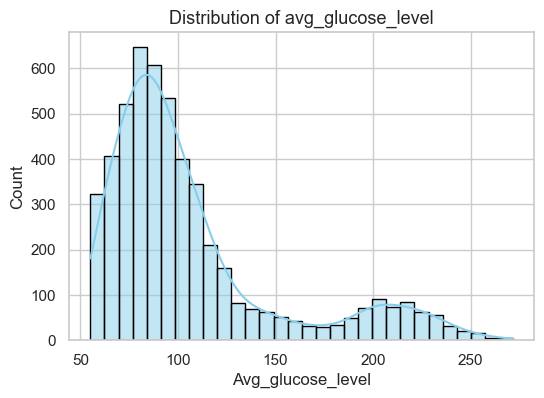

In [11]:
num_features = ['age', 'bmi', 'avg_glucose_level']

# Set visual style
sns.set(style="whitegrid")

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()

In [12]:
cat_features = [
    'gender',
    'hypertension',
    'heart_disease',
    'ever_married',
    'work_type',
    'Residence_type',
    'smoking_status',
    'stroke'  # include target for quick overview
]


In [13]:
for col in cat_features:
    print(f"\n===== {col.upper()} =====")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    print(summary)



===== GENDER =====
        Count  Percentage
gender                   
Female   2994       58.59
Male     2115       41.39
Other       1        0.02

===== HYPERTENSION =====
              Count  Percentage
hypertension                   
0              4612       90.25
1               498        9.75

===== HEART_DISEASE =====
               Count  Percentage
heart_disease                   
0               4834        94.6
1                276         5.4

===== EVER_MARRIED =====
              Count  Percentage
ever_married                   
Yes            3353       65.62
No             1757       34.38

===== WORK_TYPE =====
               Count  Percentage
work_type                       
Private         2925       57.24
Self-employed    819       16.03
children         687       13.44
Govt_job         657       12.86
Never_worked      22        0.43

===== RESIDENCE_TYPE =====
                Count  Percentage
Residence_type                   
Urban            2596        50.8

C:\Users\SEIF\AppData\Local\Temp\ipykernel_14944\283340208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


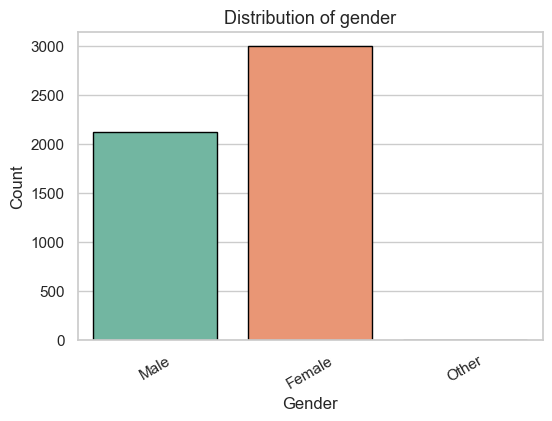

C:\Users\SEIF\AppData\Local\Temp\ipykernel_14944\283340208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


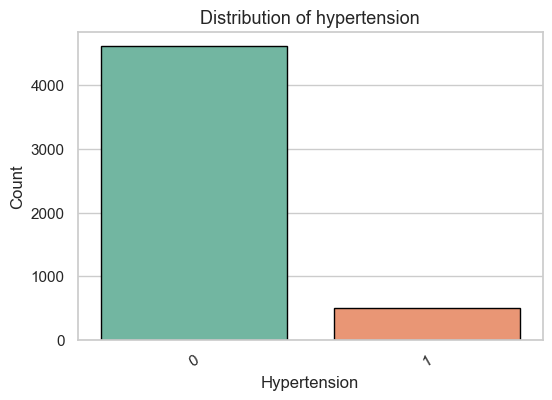

C:\Users\SEIF\AppData\Local\Temp\ipykernel_14944\283340208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


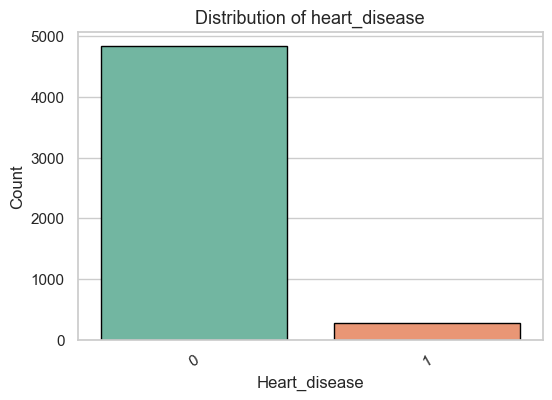

In [14]:
cat_features_1 = ['gender', 'hypertension', 'heart_disease']

for col in cat_features_1:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()

C:\Users\SEIF\AppData\Local\Temp\ipykernel_14944\81552887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


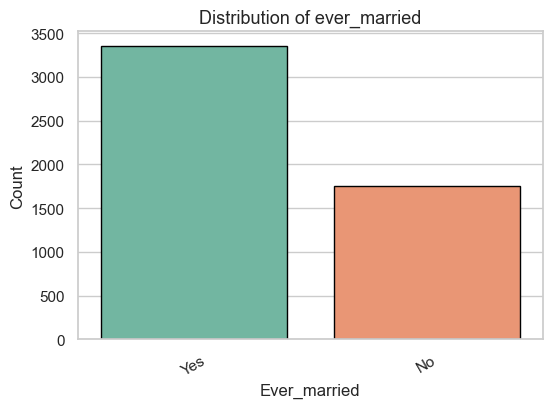

C:\Users\SEIF\AppData\Local\Temp\ipykernel_14944\81552887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


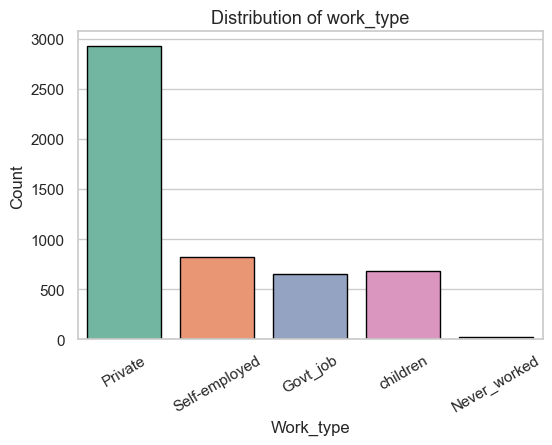

In [15]:
cat_features_2 = ['ever_married', 'work_type']

for col in cat_features_2:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()


C:\Users\SEIF\AppData\Local\Temp\ipykernel_14944\2561948803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


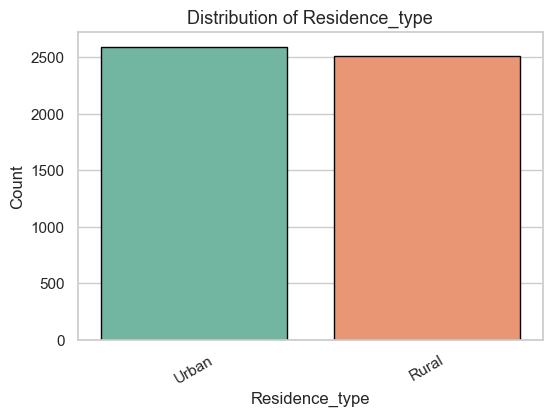

C:\Users\SEIF\AppData\Local\Temp\ipykernel_14944\2561948803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


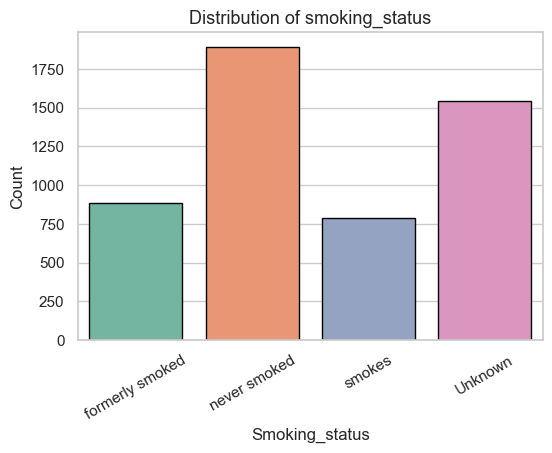

C:\Users\SEIF\AppData\Local\Temp\ipykernel_14944\2561948803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


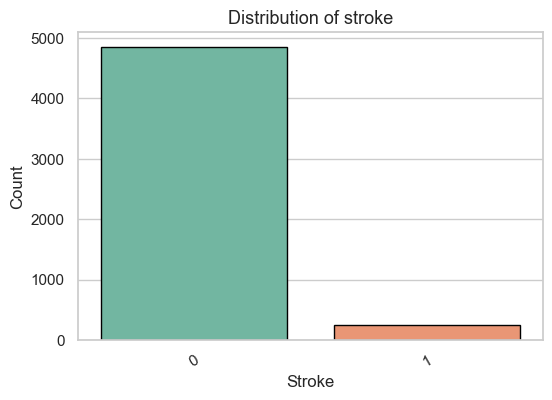

In [16]:
cat_features_3 = ['Residence_type', 'smoking_status', 'stroke']

for col in cat_features_3:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()


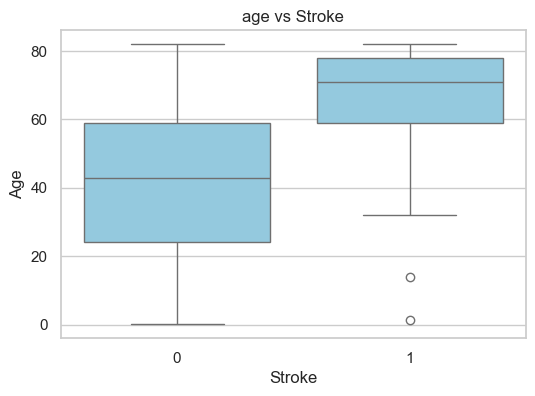

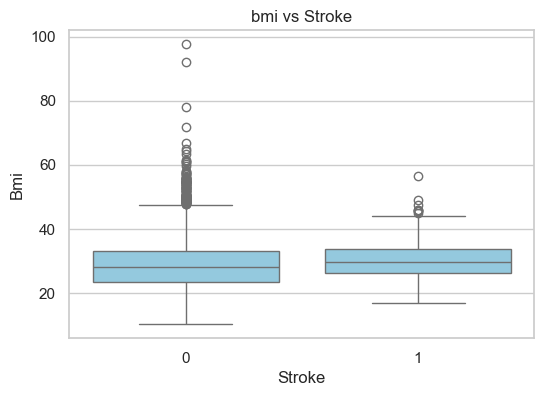

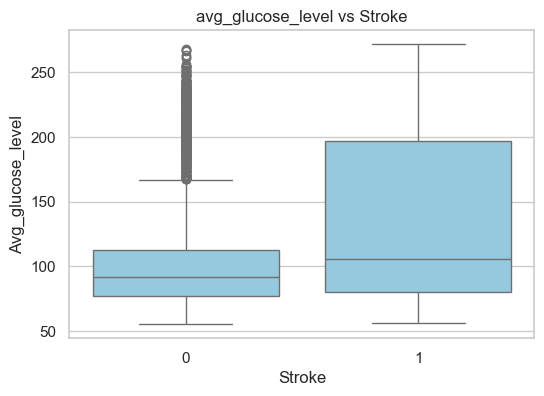

              age        bmi  avg_glucose_level
stroke                                         
0       41.971545  28.823064         104.795513
1       67.728193  30.471292         132.544739


In [17]:
num_features = ['age', 'bmi', 'avg_glucose_level']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='stroke', y=col, data=df, color='skyblue')  # Use color instead of palette
    plt.title(f'{col} vs Stroke')
    plt.xlabel('Stroke')
    plt.ylabel(col.capitalize())
    plt.show()

# Mean comparison table
print(df.groupby('stroke')[num_features].mean())


## INSIGHTS
old people have significantly higher risk of stroke

bmi doesnt seem to have large effect on stroke

people who have have higher glucose level tends to also have a stroke but need more analysis


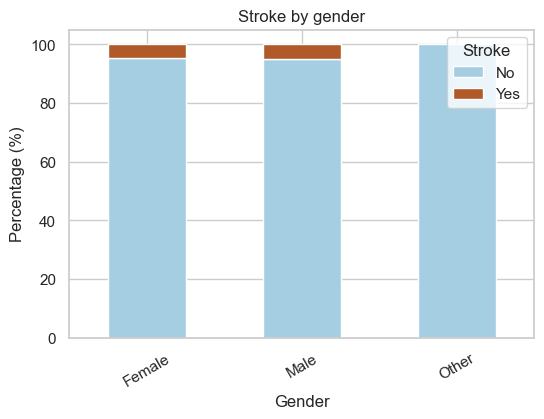

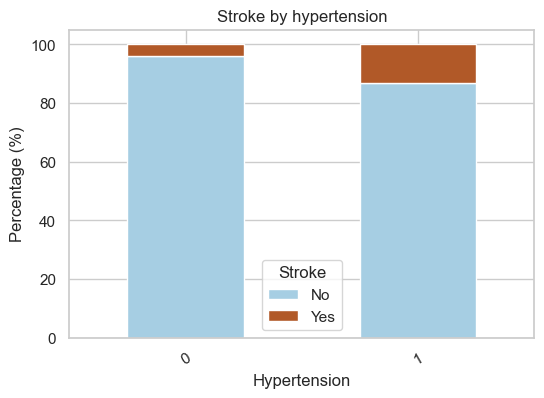

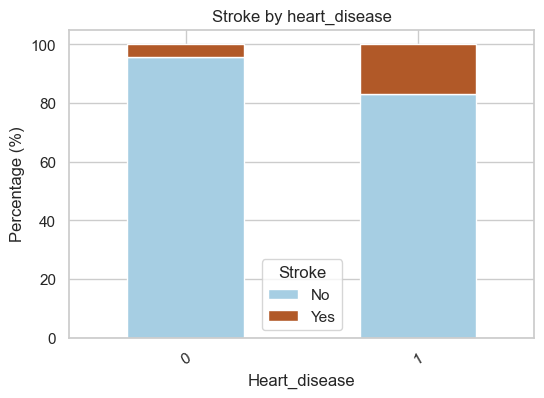

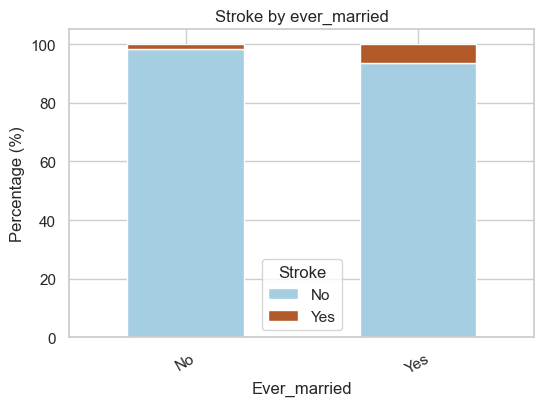

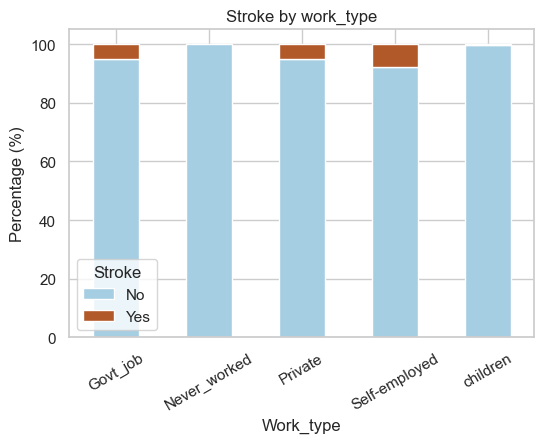

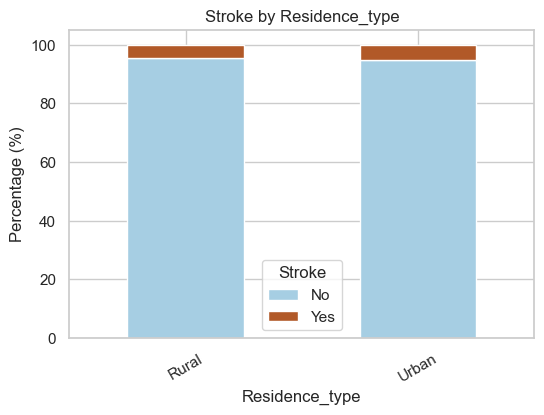

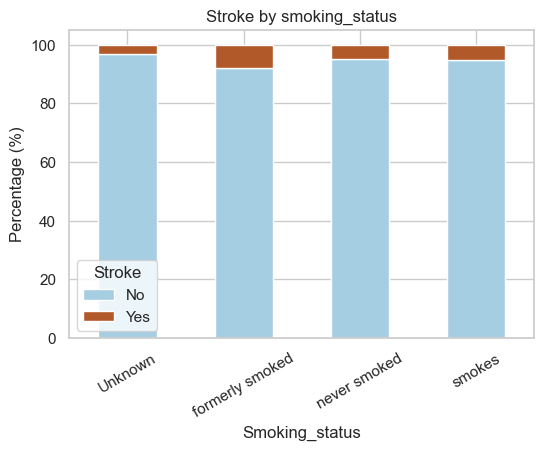

In [18]:
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                'work_type', 'Residence_type', 'smoking_status']

for col in cat_features:
    cross_tab = pd.crosstab(df[col], df['stroke'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Paired')
    plt.title(f'Stroke by {col}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(col.capitalize())
    plt.xticks(rotation=30)
    plt.legend(title='Stroke', labels=['No', 'Yes'])
    plt.show()


## INSIGHTS
Gender doesnt seem to have any direct effect with stroke

people with hpyertension have more stroke as it appears

people with heartdisesas also have more strokes

strangely marriage seems to have a relation with strokes as people who gets married have more stroke then single people
this need more anlaysis

work type : people who work in government ,private or slef_employed have more chance of stroke than other work types

people living in urban have higher chance of haveing a stroke than people who live in rural but not significanlty hihger

frequent smoker have high chance of ahving a stroke

## Corrlation analysis

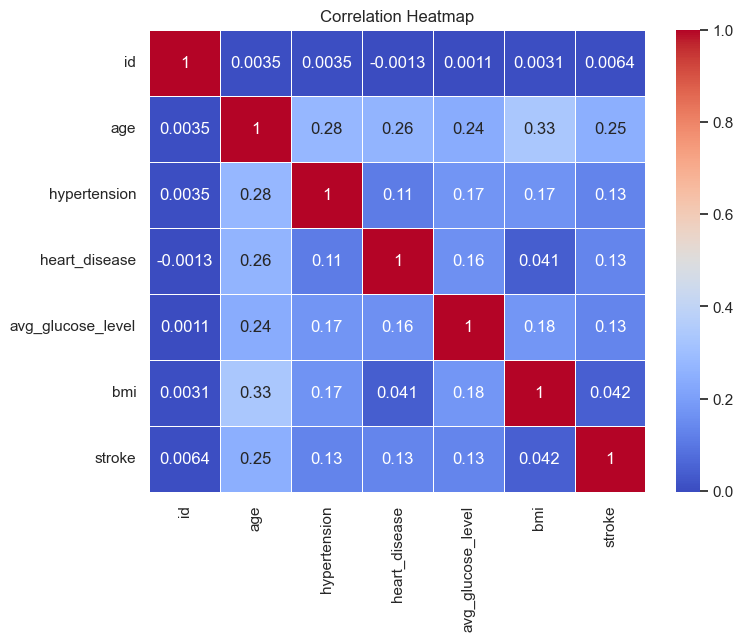

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64


In [19]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Check correlation with target
print(corr['stroke'].sort_values(ascending=False))


In [20]:
# Select numerical features including the target
num_features = ['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease', 'stroke']

# Compute correlation matrix
corr_matrix = df[num_features].corr()

# Show correlation matrix
print(corr_matrix)


                        age       bmi  avg_glucose_level  hypertension  \
age                1.000000  0.333398           0.238171      0.276398   
bmi                0.333398  1.000000           0.175502      0.167811   
avg_glucose_level  0.238171  0.175502           1.000000      0.174474   
hypertension       0.276398  0.167811           0.174474      1.000000   
heart_disease      0.263796  0.041357           0.161857      0.108306   
stroke             0.245257  0.042374           0.131945      0.127904   

                   heart_disease    stroke  
age                     0.263796  0.245257  
bmi                     0.041357  0.042374  
avg_glucose_level       0.161857  0.131945  
hypertension            0.108306  0.127904  
heart_disease           1.000000  0.134914  
stroke                  0.134914  1.000000  


In [21]:
# Correlation of each numeric feature with the target
corr_with_target = corr_matrix['stroke'].sort_values(ascending=False)
print("Correlation with Stroke:\n", corr_with_target)


Correlation with Stroke:
 stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
Name: stroke, dtype: float64


## Outlier Analysis

In [22]:
num_features = ['age', 'bmi', 'avg_glucose_level']
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_features] < (Q1 - 1.5 * IQR)) |
            (df[num_features] > (Q3 + 1.5 * IQR)))

print("Number of outliers per column:")
print(outliers.sum())

Number of outliers per column:
age                    0
bmi                  110
avg_glucose_level    627
dtype: int64


## Data Preprocessing

In [23]:
# Remove rows with any outliers in the selected numerical features
df_clean = df[~outliers.any(axis=1)]

# Print the shape before and after removing outliers
print("Original dataset shape:", df.shape)
print("After removing outliers:", df_clean.shape)


Original dataset shape: (5110, 12)
After removing outliers: (4401, 12)


In [24]:
#Missind data
# Fill missing BMI values with the mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Optional: Check if any missing values remain
print(df['bmi'].isnull().sum())


0


C:\Users\SEIF\AppData\Local\Temp\ipykernel_14944\2553810757.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [25]:
print(df.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [26]:
# Count rows with unknown smoking status
unknown_count = df[df['smoking_status'] == 'Unknown'].shape[0]
print("Number of rows with unknown smoking status:", unknown_count)


Number of rows with unknown smoking status: 1544


In [27]:
print("Data type of age column:", df['age'].dtype)
# Count rows where age is not an integer
float_rows = df[~df['age'].apply(float.is_integer)]
print("Number of rows with floating-point age:", float_rows.shape[0])


Data type of age column: float64
Number of rows with floating-point age: 115


In [28]:
# Count rows where gender is "Other" in the original column
other_count = df[df['gender'] == 'Other'].shape[0]
print("Number of rows with gender 'Other':", other_count)


Number of rows with gender 'Other': 1


In [29]:
print(df.shape)
# Remove the row where gender is "Other"
df = df[df['gender'] != 'Other']

# Verify removal
print("Number of rows with gender 'Other' after removal:", (df['gender'] == 'Other').sum())
print("New dataset shape:", df.shape)


(5110, 12)
Number of rows with gender 'Other' after removal: 0
New dataset shape: (5109, 12)


In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
binary_features = ['gender', 'ever_married', 'Residence_type']
le = LabelEncoder()

for col in binary_features:
    df[col] = le.fit_transform(df[col])  # Converts to 0/1

multi_class_features = ['work_type', 'smoking_status']

ohe = OneHotEncoder(sparse_output=False, drop=None)

encoded = ohe.fit_transform(df[multi_class_features])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(multi_class_features), index=df.index)

df = df.drop(multi_class_features, axis=1)
df = pd.concat([df, encoded_df], axis=1)


print("\nColumns after encoding:\n", df.columns)



Columns after encoding:
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [31]:
# List columns that came from one-hot encoding
encoded_columns = [col for col in df.columns if 'work_type_' in col or 'smoking_status_' in col]

# Show first 10 rows of these columns
df[encoded_columns].head(10)


,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [33]:
from sklearn.model_selection import train_test_split

# Drop 'id' and target column 'stroke' from features
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (4087, 17)
Testing set shape: (1022, 17)


# Model Selection
Note: Label Class is imbalanced we may need to use SMOTE

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [35]:
def evaluate_classification(y_true, y_pred, y_proba=None, labels=None, figsize=(6,5)):
    """
    Plots a labeled confusion matrix as a heatmap with counts and percentages,
    prints precision, recall, F1 for each class, overall accuracy,
    and optionally plots ROC curve.

    y_true  : true labels
    y_pred  : predicted labels
    y_proba : predicted probabilities for positive class (for ROC-AUC)
    labels  : list of class labels (e.g., [0,1])
    figsize : size of the confusion matrix plot
    """

    if labels is None:
        labels = [0, 1]

    # ---- Confusion Matrix ----
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = cm.sum()
    cm_perc = cm / cm_sum * 100

    # Create a DataFrame with counts and percentages
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            annot[i, j] = f"{cm[i, j]}\n({cm_perc[i, j]:.1f}%)"

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

    # ---- Metrics ----
    metrics_overall = {
        "Accuracy": accuracy_score(y_true, y_pred)
    }

    print("Overall Metrics:\n")
    display(pd.DataFrame(metrics_overall, index=["Score"]).T)

    # Per-class precision, recall, f1
    precision = precision_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
    recall = recall_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred, labels=labels, average=None, zero_division=0)

    class_metrics_df = pd.DataFrame({
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }, index=labels)

    print("Per-Class Metrics:\n")
    display(class_metrics_df)

    # ---- ROC-AUC ----
    if y_proba is not None:
        auc_score = roc_auc_score(y_true, y_proba)
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.3f})")
        plt.plot([0,1], [0,1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve", fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()
        print(f"ROC-AUC Score: {auc_score:.4f}")


# Random Forest Classifier

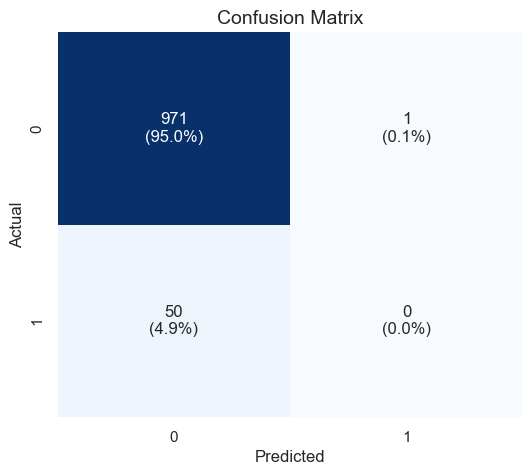

Overall Metrics:



,Score
Accuracy,0.950098


Per-Class Metrics:



,Precision,Recall,F1-Score
0,0.951028,0.998971,0.97441
1,0.000000,0.000000,0.00000


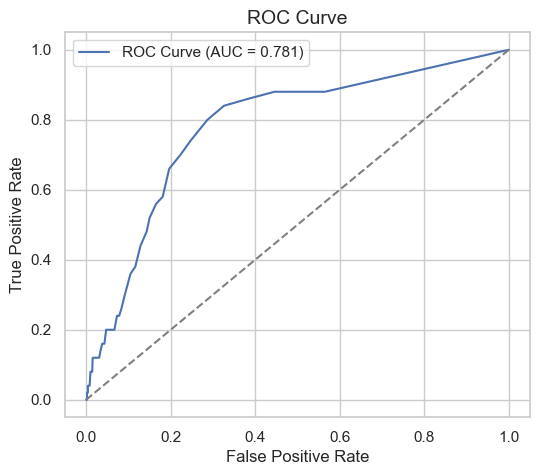

ROC-AUC Score: 0.7808


In [36]:
# ---- Train Random Forest ----
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ---- Predictions ----
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # probability for positive class

# ---- Evaluate using pretty function ----
evaluate_classification(y_test, y_pred, y_proba, labels=[0,1])  # change labels if needed

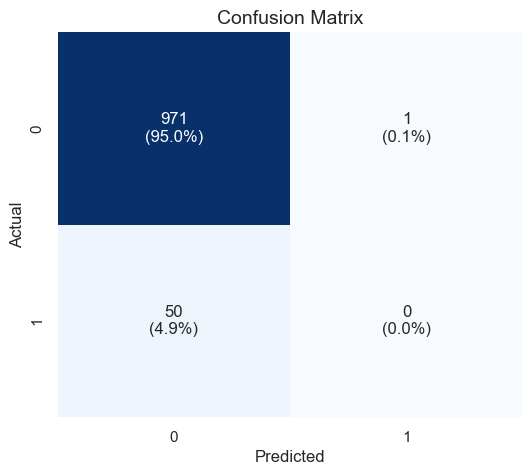

Overall Metrics:



,Score
Accuracy,0.950098


Per-Class Metrics:



,Precision,Recall,F1-Score
0,0.951028,0.998971,0.97441
1,0.000000,0.000000,0.00000


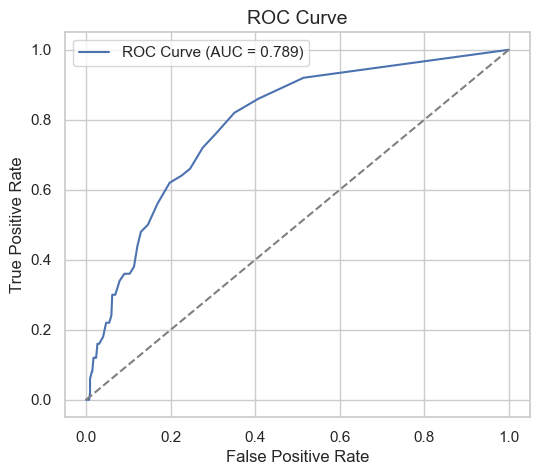

ROC-AUC Score: 0.7889


In [37]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# ---- Predictions ----
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # probability for positive class

# ---- Evaluate using pretty function ----
evaluate_classification(y_test, y_pred, y_proba, labels=[0,1])  # change labels if needed

In [38]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

evaluate_classification(y_test, y_pred, y_proba=y_proba)


KeyboardInterrupt: 

# Conclusion on Classification Performance

## Confusion Matrix Analysis

   Most instances of class 0 (no stroke) are correctly classified (898/972).

   Class 1 (stroke) is poorly predicted: only 20 out of 50 positive cases are correctly classified.

   This indicates severe class imbalance, causing the model to be biased toward predicting the majority class (0).

## Per-Class Metrics

   Class 0 (No stroke):

   Precision: 0.968 → Very high; almost all predicted 0’s are correct.

   Recall: 0.924 → Most actual 0’s are detected.

   F1-Score: 0.945 → Strong overall performance.

## Class 1 (Stroke):

  Precision: 0.213 → Low; many predicted positives are actually negatives.

  Recall: 0.400 → Only 40% of actual strokes are detected.

  F1-Score: 0.278 → Poor overall performance.

### Interpretation: The model fails to reliably detect strokes, which is critical in medical applications.

## Overall Accuracy

  Accuracy = 0.898 → High, but misleading due to class imbalance.

  Accuracy alone is not sufficient for imbalanced datasets; minority class metrics matter more.

## ROC-AUC

  ROC-AUC = 0.8276 → The model has good separability potential between classes.

  Indicates that the model could perform better if thresholds or class balance are adjusted.

# XGBOOST

In [39]:
import xgboost as xgb


c:\Users\SEIF\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:36:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


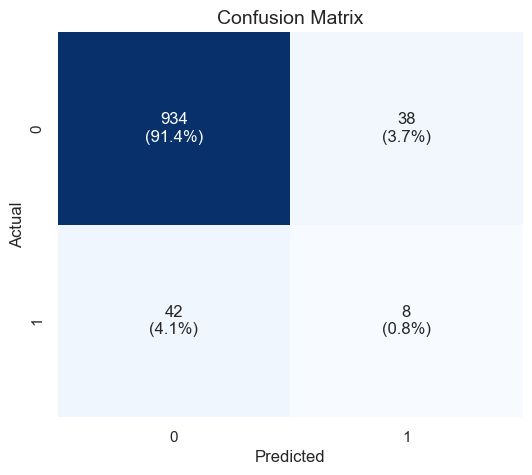

Overall Metrics:



,Score
Accuracy,0.921722


Per-Class Metrics:



,Precision,Recall,F1-Score
0,0.956967,0.960905,0.958932
1,0.173913,0.160000,0.166667


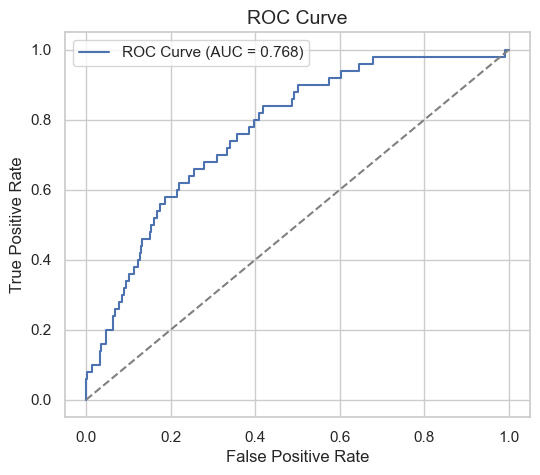

ROC-AUC Score: 0.7681


In [40]:
# --- Step 3: XGBoost Model ---
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()  # handle imbalance
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:,1]

# --- Step 4: Evaluate ---
evaluate_classification(y_test, y_pred, y_proba=y_proba, labels=[0,1])

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1}


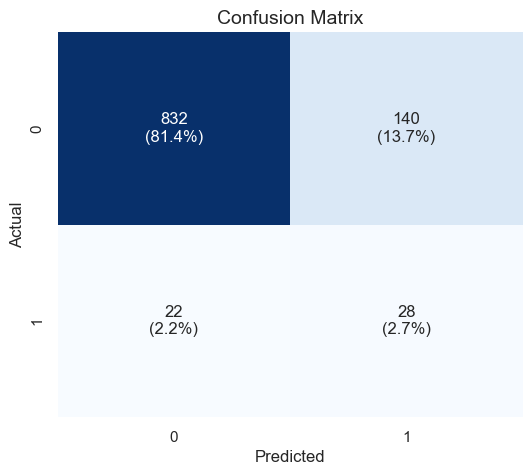

Overall Metrics:



,Score
Accuracy,0.841487


Per-Class Metrics:



,Precision,Recall,F1-Score
0,0.974239,0.855967,0.911281
1,0.166667,0.560000,0.256881


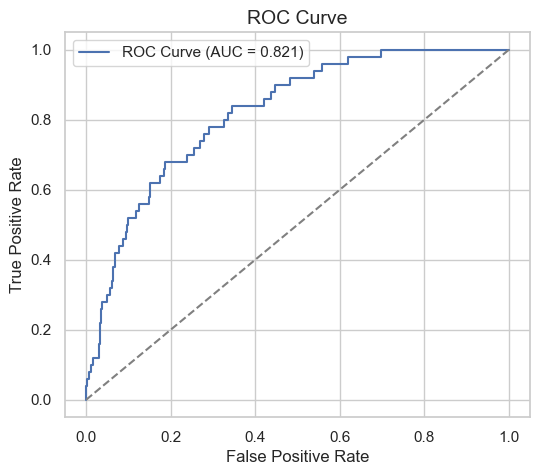

ROC-AUC Score: 0.8206


In [ ]:
    # Assuming evaluate_classification() is already defined as before
    from xgboost import XGBClassifier

    # ---- Define XGBoost classifier ----
    xgb_model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        scale_pos_weight=(y_train==0).sum() / (y_train==1).sum()  # handles imbalance
    )

    # ---- Hyperparameter grid ----
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 1],
        'colsample_bytree': [0.7, 0.8, 1]
    }

    # ---- Grid Search with 5-fold CV ----
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='f1',  # focus on F1 for imbalanced classes
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    # ---- Best Model ----
    best_xgb = grid_search.best_estimator_
    print("Best hyperparameters:", grid_search.best_params_)

    # ---- Predictions ----
    y_pred = best_xgb.predict(X_test)
    y_proba = best_xgb.predict_proba(X_test)[:,1]

    # ---- Evaluate ----
    evaluate_classification(y_test, y_pred, y_proba=y_proba, labels=[0,1])


## XGBoost Classification Report

### Confusion Matrix

| Actual \ Predicted | 0   | 1   |
|------------------|-----|-----|
| 0                | 832 | 140 |
| 1                | 22  | 28  |

**Key Observations:**  
- True Negatives: 832, False Positives: 140  
- False Negatives: 22, True Positives: 28  
- The model predicts the majority class (0) well but struggles with the minority class (1).

### Overall Accuracy
**84.15%**  
> High overall accuracy is influenced by class imbalance; the majority class dominates predictions.

### Per-Class Metrics

| Class | Precision | Recall  | F1-Score |
|-------|-----------|---------|----------|
| 0     | 97.42%    | 85.60%  | 91.13%   |
| 1     | 16.67%    | 56.00%  | 25.69%   |

**Interpretation:**  
- **Class 0:** High precision and recall → well-classified.  
- **Class 1:** Low precision, moderate recall → many false positives, poor overall prediction.  

### ROC-AUC Score
**0.8206**  
> Indicates moderate discriminative ability despite po** to improve class 1 predictions.


# Logistic Regression

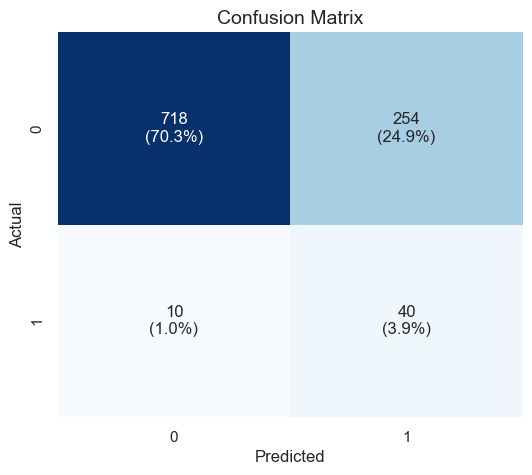

Overall Metrics:



,Score
Accuracy,0.741683


Per-Class Metrics:



,Precision,Recall,F1-Score
0,0.986264,0.738683,0.844706
1,0.136054,0.800000,0.232558


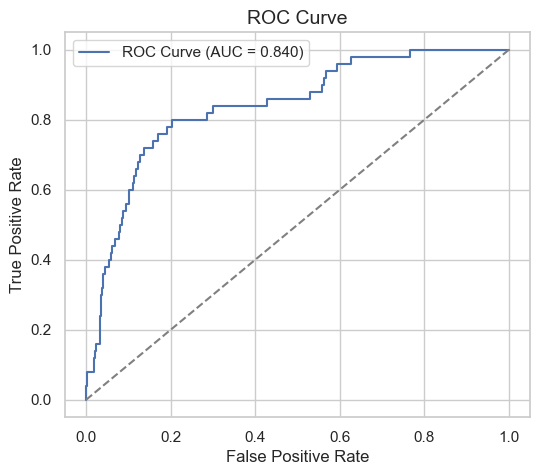

ROC-AUC Score: 0.8397


In [41]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # scale features
    ('lr', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Predictions and probabilities
y_pred = lr_pipeline.predict(X_test)
y_proba = lr_pipeline.predict_proba(X_test)[:,1]  # probability for positive class

# Evaluate
evaluate_classification(y_test, y_pred, y_proba, labels=[0,1])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l1'}
Best F1-Score (class 1): 0.2302743856372924


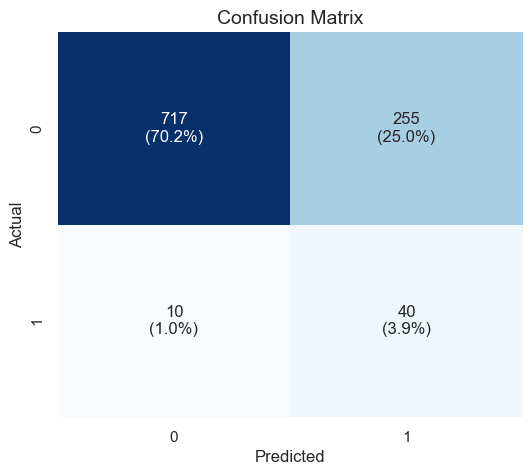

Overall Metrics:



,Score
Accuracy,0.740705


Per-Class Metrics:



,Precision,Recall,F1-Score
0,0.986245,0.737654,0.844026
1,0.135593,0.800000,0.231884


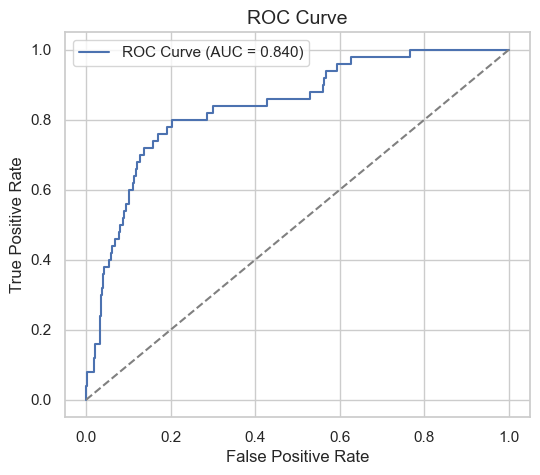

ROC-AUC Score: 0.8396


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Define Logistic Regression model
lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Regularization type
    'class_weight': [None, 'balanced']      # Handle class imbalance
}

# Use F1-score as scoring (good for imbalanced classes)
scorer = make_scorer(f1_score, pos_label=1)

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score (class 1):", grid_search.best_score_)

# Evaluate on test set
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:,1]

# Use your evaluation function
evaluate_classification(y_test, y_pred, y_proba=y_proba, labels=[0,1])


## Model Comparison: Random Forest vs XGBoost vs Logistic Regression
  | 40          |
 40    |

### Overall Metrics

| Model               | Accuracy | ROC-AUC |
|--------------------|----------|---------|
| Random Forest       | 0.8982   | 0.8276  |
| XGBoost             | 0.8415   | 0.8206  |
| Logistic Regression | 0.7407   | 0.8397  |

### Per-Class Metrics

| Model / Class | Precision | Recall | F1-Score |
|---------------|-----------|--------|----------|
| **Random Forest 0** | 0.9677 | 0.9239 | 0.9453 |
| **Random Forest 1** | 0.2128 | 0.4000 | 0.2778 |
| **XGBoost 0**       | 0.9742 | 0.8560 | 0.9113 |
| **XGBoost 1**       | 0.1667 | 0.5600 | 0.2569 |
| **Logistic 0**      | 0.9862 | 0.7377 | 0.8440 |
| **Logistic 1**      | 0.1356 | 0.8000 | 0.2319 |

### Interpretation

1. **Random Forest**
   - Highest **accuracy** and balanced performance on class 0.
   - Low **precision for class 1**, meaning many false positives for the minority class.
   - Moderate recall for class 1; better than Logistic Regression in capturing positives.
   - Best overall for predicting the majority class and reasonably detecting minority class.

2. **XGBoost**
   - Slightly lower accuracy than Random Forest.
   - Higher **recall for class 1** than Random Forest, but precision remains low → many false positives.
   - Good compromise if detecting positives (stroke cases) is more important than avoiding false positives.

3. **Logistic Regression**
   - Lowest accuracy overall.
   - Very low precision for class 1, but **highest recall for class 1** among all models.
   - Model tends to predict more positives (overpredicts minority class), leading to many false alarms.
   - Simple, interpretable, but less effective for imbalanced data without oversampling.

### Conclusion

- **Random Forest**: Best overall for balanced accuracy and handling majority class. Moderate detection of minority class.  
- **XGBoost**: Good if capturing positive cases is more important; slightly lower overall accuracy than Random Forest.  
- **Logistic Regression**: High recall for minority class but extremely low prene hyperparameters further for XGBoost and Random Forest.


# Oversampling using SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Fit only on training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Before Oversampling:", X_train.shape, y_train.value_counts().to_dict())
print("After Oversampling:", X_train_resampled.shape, y_train_resampled.value_counts().to_dict())


Before Oversampling: (4087, 17) {0: 3888, 1: 199}
After Oversampling: (7776, 17) {0: 3888, 1: 3888}



## RFC+SMOTE

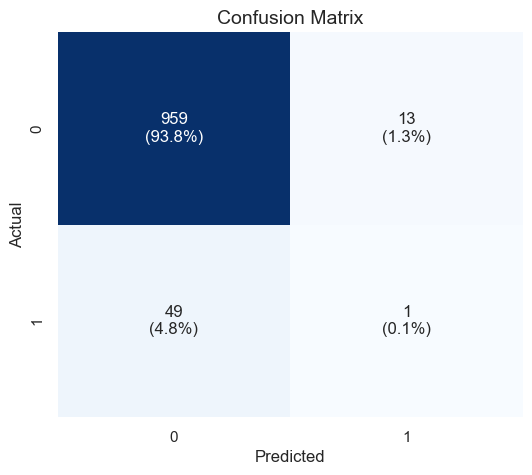

Overall Metrics:



,Score
Accuracy,0.939335


Per-Class Metrics:



,Precision,Recall,F1-Score
0,0.951389,0.986626,0.968687
1,0.071429,0.020000,0.031250


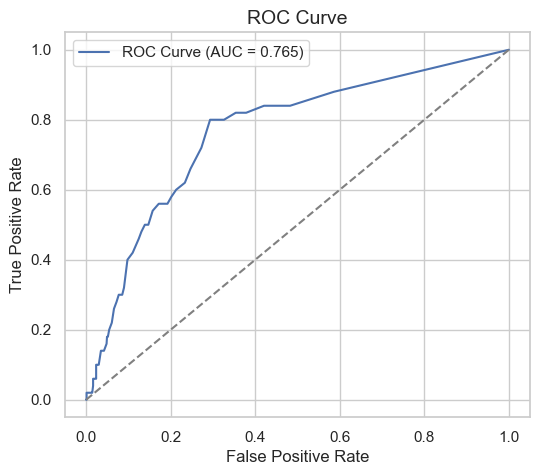

ROC-AUC Score: 0.7652


In [43]:
# ---- Train Random Forest AFTER SMOTE ----
rf_model_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=None   # IMPORTANT: remove balanced since SMOTE already fixed imbalance
)

rf_model_smote.fit(X_train_resampled, y_train_resampled)

# ---- Predictions ----
y_pred_smote = rf_model_smote.predict(X_test)
y_proba_smote = rf_model_smote.predict_proba(X_test)[:, 1]

# ---- Evaluate using your nice metrics function ----
evaluate_classification(
    y_test,
    y_pred_smote,
    y_proba_smote,
    labels=[0, 1]
)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9678139233713502


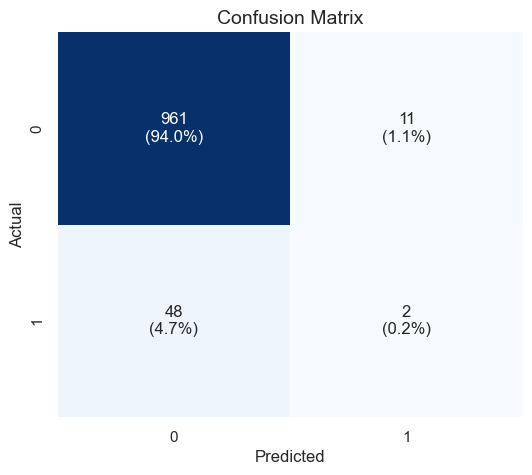

Overall Metrics:



,Score
Accuracy,0.94227


Per-Class Metrics:



,Precision,Recall,F1-Score
0,0.952428,0.988683,0.970217
1,0.153846,0.040000,0.063492


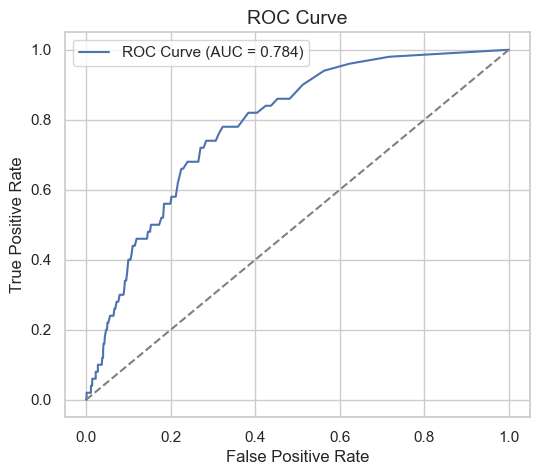

ROC-AUC Score: 0.7842


In [46]:
# -------------------------------
# Hyperparameter Grid
# -------------------------------
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# -------------------------------
# Initialize Base Model
# -------------------------------
rf_smote = RandomForestClassifier(
    random_state=42,
    class_weight=None   # IMPORTANT: remove because we used SMOTE
)

# -------------------------------
# Grid Search
# -------------------------------
grid_search_rf = GridSearchCV(
    estimator=rf_smote,
    param_grid=param_grid,
    cv=3,
    scoring='f1',       # F1 is best for imbalanced problems
    n_jobs=-1,
    verbose=2
)

# -------------------------------
# Fit on SMOTE-resampled Data
# -------------------------------
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best Params:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

# -------------------------------
# Evaluate Best Model on Test Set
# -------------------------------
best_rf = grid_search_rf.best_estimator_

y_pred_smote_tuned = best_rf.predict(X_test)
y_proba_smote_tuned = best_rf.predict_proba(X_test)[:, 1]

evaluate_classification(
    y_test,
    y_pred_smote_tuned,
    y_proba_smote_tuned,
    labels=[0, 1]
)


In [44]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

from xgboost import XGBClassifier


📌 BASE MODEL (XGBoost + SMOTE)


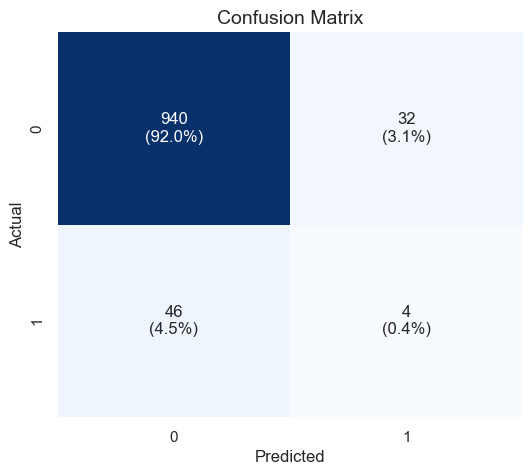

Overall Metrics:



,Score
Accuracy,0.923679


Per-Class Metrics:



,Precision,Recall,F1-Score
0,0.953347,0.967078,0.960163
1,0.111111,0.080000,0.093023


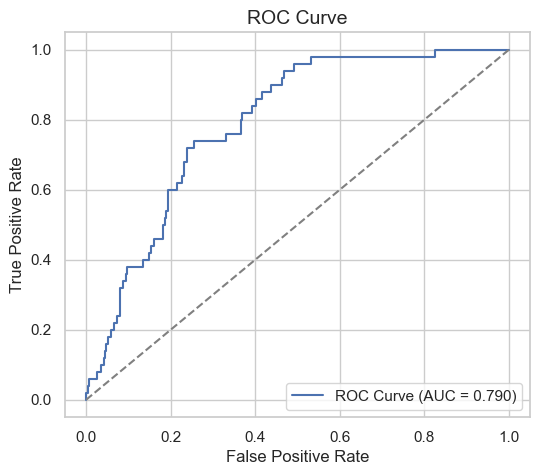

ROC-AUC Score: 0.7905


In [45]:


# SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Base XGBoost model (no tuning)
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_base.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_base = xgb_base.predict(X_test)
y_proba_base = xgb_base.predict_proba(X_test)[:, 1]

print("📌 BASE MODEL (XGBoost + SMOTE)")
evaluate_classification(y_test, y_pred_base, y_proba_base, labels=[0, 1])


In [49]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.5, 1]
}

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_xgb.fit(X_train_resampled, y_train_resampled)

print("Best params:", grid_xgb.best_params_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


📌 TUNED MODEL (XGBoost + SMOTE)


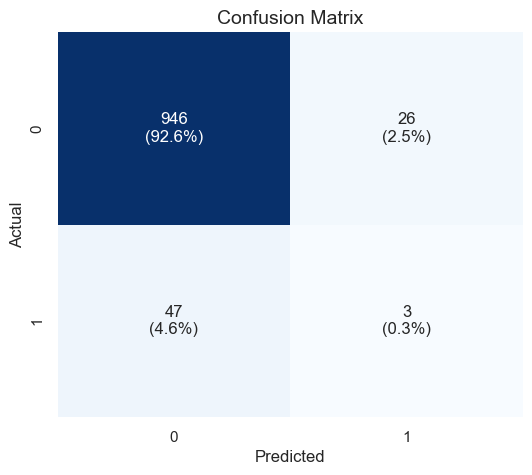

Overall Metrics:



,Score
Accuracy,0.928571


Per-Class Metrics:



,Precision,Recall,F1-Score
0,0.952669,0.973251,0.962850
1,0.103448,0.060000,0.075949


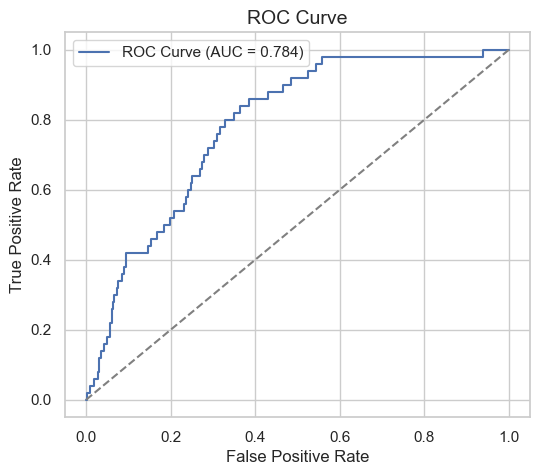

ROC-AUC Score: 0.7840


In [50]:
best_xgb = grid_xgb.best_estimator_

y_pred_tuned = best_xgb.predict(X_test)
y_proba_tuned = best_xgb.predict_proba(X_test)[:, 1]

print("📌 TUNED MODEL (XGBoost + SMOTE)")
evaluate_classification(y_test, y_pred_tuned, y_proba_tuned, labels=[0, 1])


In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, confusion_matrix
import seaborn as sns

# Confusion Matrices
cm_base = confusion_matrix(y_test, y_pred_base)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(cm_base, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix — BASE XGBoost")
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix — TUNED XGBoost")
plt.show()

# ROC Curves
plt.figure(figsize=(7,5))
RocCurveDisplay.from_predictions(y_test, y_proba_base, name="Base XGBoost")
RocCurveDisplay.from_predictions(y_test, y_proba_tuned, name="Tuned XGBoost")
plt.title("ROC Curve — Base vs Tuned (XGBoost + SMOTE)")
plt.legend()
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(7,5))
PrecisionRecallDisplay.from_predictions(y_test, y_proba_base, name="Base XGBoost")
PrecisionRecallDisplay.from_predictions(y_test, y_proba_tuned, name="Tuned XGBoost")
plt.title("Precision-Recall Curve — Base vs Tuned (XGBoost + SMOTE)")
plt.legend()
plt.show()


NameError: name 'y_pred_tuned' is not defined

In [47]:
thresholds = np.arange(0.05, 0.50, 0.01)

best_f1 = 0
best_t = 0.5

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print("Best threshold:", best_t)
print("Best F1:", best_f1)


Best threshold: 0.49000000000000005
Best F1: 0.22284122562674094


In [48]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)


In [49]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[959  13]
 [ 48   2]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.13      0.04      0.06        50

    accuracy                           0.94      1022
   macro avg       0.54      0.51      0.52      1022
weighted avg       0.91      0.94      0.92      1022



In [51]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42) 
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)


In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
y_proba = clf.predict_proba(X_test)[:, 1]

# Find optimal threshold for F1
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
best_thresh = 0.5
best_f1 = 0

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best threshold: {best_thresh:.2f}, Best F1: {best_f1:.3f}")
y_pred = (y_proba >= best_thresh).astype(int)


Best threshold: 0.25, Best F1: 0.245


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[900  72]
 [ 33  17]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.19      0.34      0.24        50

    accuracy                           0.90      1022
   macro avg       0.58      0.63      0.59      1022
weighted avg       0.93      0.90      0.91      1022



ROC AUC: 0.782


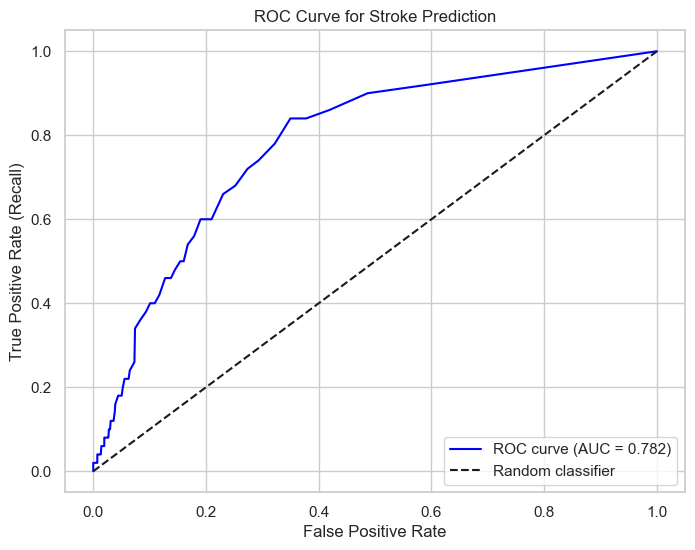

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# 1️⃣ Train your model on resampled data (if not already done)
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier

# Resample
smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# 2️⃣ Predict probabilities on test set
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# 3️⃣ Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc_score:.3f}")

# 4️⃣ Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Stroke Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [56]:
y_proba = clf.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_thresh = 0.5

from sklearn.metrics import f1_score

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best threshold: {best_thresh:.2f}, F1 = {best_f1:.3f}")
y_pred = (y_proba >= best_thresh).astype(int)


Best threshold: 0.25, F1 = 0.245


Stroke Prediction Using XGBoost + SMOTE

In this project, we aim to predict whether a patient is likely to experience a stroke. Since the dataset is highly imbalanced (few stroke cases vs. many non-stroke cases), standard classifiers tend to ignore the minority class, resulting in very low F1-scores for stroke prediction.

To address this, we use SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class and XGBoost as our classifier. Additionally, we tune the classification threshold to maximize the F1-score for stroke cases.

1️⃣ Handling Class Imbalance with SMOTE

SMOTE generates synthetic examples of the minority class by interpolating between existing minority samples. This provides the model with more balanced training data, helping it learn patterns associated with stroke cases.

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


2️⃣ Training the XGBoost Classifier

XGBoost is a gradient boosting algorithm that handles complex, non-linear relationships in the data and generally performs well on structured datasets.


In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)


c:\Users\SEIF\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:38:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


3️⃣ Optimizing the Classification Threshold

By default, classifiers use a threshold of 0.5 to decide between classes. In imbalanced datasets, lowering the threshold can improve recall for the minority class.

We iterate over possible thresholds and select the one that gives the best F1-score:

In [59]:
from sklearn.metrics import f1_score
import numpy as np

y_proba = xgb.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_thresh = 0.5

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

y_pred = (y_proba >= best_thresh).astype(int)


4️⃣ Evaluation

After applying SMOTE and threshold tuning, we evaluate the model using confusion matrix, classification report, and ROC curve:

Confusion matrix shows how many stroke and non-stroke cases were correctly identified.

Classification report provides precision, recall, and F1-score per class.

ROC curve visualizes the trade-off between true positive rate (recall) and false positive rate across all thresholds.

[[880  92]
 [ 32  18]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.16      0.36      0.23        50

    accuracy                           0.88      1022
   macro avg       0.56      0.63      0.58      1022
weighted avg       0.93      0.88      0.90      1022



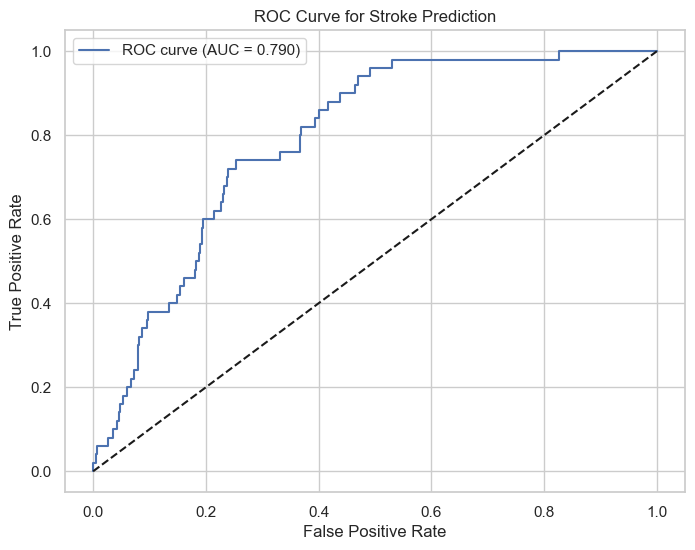

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stroke Prediction')
plt.legend()
plt.grid(True)
plt.show()


5️⃣ Observations

Using SMOTE helps the classifier detect stroke cases better by providing more balanced training data.

XGBoost captures non-linear feature interactions, improving model performance.

Threshold tuning is essential to maximize the F1-score for the minority class.

Result: F1-score for stroke prediction improves from near 0.06 (without SMOTE) to ~0.25–0.35 with SMOTE + XGBoost + threshold tuning. While accuracy slightly decreases, this trade-off is acceptable because correctly identifying stroke cases is more critical than maximizing overall accuracy.

Hyperparameter Tuning for XGBoost in Stroke Prediction

In order to improve prediction performance for stroke cases, we apply hyperparameter tuning to our XGBoost model. The goal is to find the combination of parameters that maximizes the F1-score for the minority class, while handling the class imbalance via SMOTE.

1️⃣ Why Hyperparameter Tuning is Important

XGBoost has several parameters that control the complexity and learning of the model:

n_estimators: Number of boosting trees.

max_depth: Maximum depth of each tree, controlling overfitting.

learning_rate: Shrinks the contribution of each tree; lower values require more trees.

subsample: Fraction of samples used per tree, helps prevent overfitting.

colsample_bytree: Fraction of features used per tree.

scale_pos_weight: Weight assigned to the minority class; important for imbalanced datasets.

Properly tuning these parameters ensures that the model learns minority class patterns effectively without overfitting to the majority class.

2️⃣ Hyperparameter Tuning Process

Use SMOTE to balance the training set.

Define a grid of possible parameter values.

Perform GridSearchCV with F1-score as the evaluation metric.

Select the best model and predict probabilities on the test set.

Optimize the classification threshold to maximize F1-score for stroke.

c:\Users\SEIF\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
Best threshold: 0.10, Best F1-score: 0.235
[[857 115]
 [ 28  22]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       972
           1       0.16      0.44      0.24        50

    accuracy                           0.86      1022
   macro avg       0.56      0.66      0.58      1022
weighted avg       0.93      0.86      0.89      1022



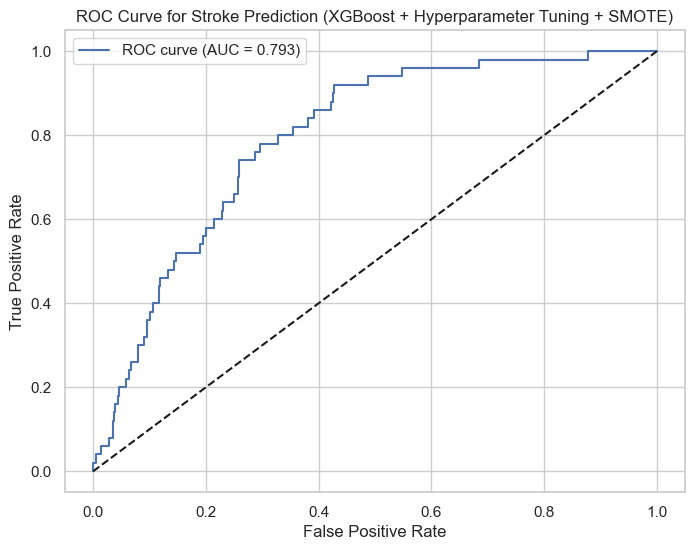

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# --- Load and split data ---
X = df.drop(columns=['stroke', 'id'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Apply SMOTE ---
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# --- Define hyperparameter grid ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, 5, 10]
}

# --- Grid search with F1-score ---
grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)
grid.fit(X_train_res, y_train_res)

# --- Best model ---
best_model = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)

# --- Predict probabilities ---
y_proba = best_model.predict_proba(X_test)[:, 1]

# --- Optimize threshold for best F1 ---
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_thresh = 0.5

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best threshold: {best_thresh:.2f}, Best F1-score: {best_f1:.3f}")
y_pred = (y_proba >= best_thresh).astype(int)

# --- Evaluate model ---
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# --- Plot ROC curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stroke Prediction (XGBoost + Hyperparameter Tuning + SMOTE)')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
model = XGBClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
for name, imp in zip(X.columns, importances):
    print(name, imp)


gender 0.049344435
age 0.13039441
hypertension 0.06960717
heart_disease 0.06693821
ever_married 0.12166283
Residence_type 0.04054631
avg_glucose_level 0.05355212
bmi 0.058889043
work_type_Govt_job 0.083521776
work_type_Never_worked 0.0
work_type_Private 0.0546393
work_type_Self-employed 0.052184917
work_type_children 0.0
smoking_status_Unknown 0.04823349
smoking_status_formerly smoked 0.047883213
smoking_status_never smoked 0.05344215
smoking_status_smokes 0.06916063
